In [40]:
Pkg.add("SymPy")

INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [41]:
using SymPy

In [42]:
x=symbols("x")

x

In [43]:
#Se define la función a integrar
function f(x)
    return x
end

f (generic function with 1 method)

In [44]:
b=linspace(1,10,200);

In [45]:
length(b)

200

In [46]:
#Ejercicio 3
function Simpson(f,b)
    p=0
    for i in 1:length(b)-1
    a=b[i]
    c=b[i+1]
        #el código para calcular la integral por el método de Simpson es completamente análogo a los dos anteriores, simplemente varía en la forma de aproximarse a la integral, ahora se hace mediante un polinomio de segundo grado.
    p=p+((c-a)/6)*(f(a)+4f((a+c)/2)+f(c))
    end
    return p
end

Simpson (generic function with 1 method)

In [47]:
#La aproximación que arroja el método de Simpson es muy próxima al valor real de la integral.
Simpson(f,b)

49.499999999999964

In [48]:
#Ejercicio 4
#Interpolación polinomial en la forma de Lagrange
#Se define la función coseno de x
function f(x)
    return cos(x)
end

f (generic function with 1 method)

In [49]:
#Se toman 10 puntos dentro del intervalo [0,2pi], los cuales corresponden al dominio de la función.
listx=linspace(0,2pi,10)

0.0:0.6981317007977318:6.283185307179586

In [50]:
collect(listx)

10-element Array{Float64,1}:
 0.0     
 0.698132
 1.39626 
 2.0944  
 2.79253 
 3.49066 
 4.18879 
 4.88692 
 5.58505 
 6.28319 

In [51]:
listx[2]

0.6981317007977318

In [52]:
length(listx)

10

In [53]:
#En este punto el programa imprime la lista de los puntos de la listx evaluados en la función f antes definida.
listy=f(listx)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] f(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./In[48]:3
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:160
 [6] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##11#14)() at ./task.jl:335
while loading In[53], in expression starting on line 1


10-element Array{Float64,1}:
  1.0     
  0.766044
  0.173648
 -0.5     
 -0.939693
 -0.939693
 -0.5     
  0.173648
  0.766044
  1.0     

In [54]:
using PyPlot

In [55]:
using SymPy

In [56]:
#Como primer punto se construye el programa para calcular las bases polinómicas, nótese que la máxima potencia que éstas pueden tener corresponden al número de puntos dentro del intervalo.
function bases(index,listx)
    l=1
    for i in 1:length(listx)
        if i != index
            l= l*(Sym("x")-listx[i])/(listx[index]-listx[i])        
        end
    end
    return l
end

bases (generic function with 1 method)

In [60]:
bases(10,listx)

6.99520967905925e-5*x*(x - 5.58505360638185)*(x - 4.88692190558412)*(x - 4.188
79020478639)*(x - 3.49065850398866)*(x - 2.79252680319093)*(x - 2.094395102393
2)*(x - 1.39626340159546)*(x - 0.698131700797732)

In [58]:
#Ahora realizamos el código para obtener el polinomio interpolador, el cual se obtiene con la combinación lineal entre las bases polinómicas y el conjunto de puntos de la listx.
function lagrange(list1,list2)
    L=0
    for i=1:length(list2)
        L=L+bases(i,list1)*list2[i]
    end
    return expand(L)
end

lagrange (generic function with 1 method)

In [61]:
lagrange(listx,listy)

                      9                        8                         7    
7.42678488152571e-18*x  - 1.97979336359812e-5*x  + 0.000497576342935013*x  - 0

                    6                        5                       4        
.00411366974808214*x  + 0.00878850466172487*x  + 0.0243778891541915*x  + 0.020

               3                      2                              
1425548285172*x  - 0.512543349763863*x  + 0.00313254720749789*x + 1.0

In [21]:
Pkg.add("PyPlot")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [28]:
using PyPlot

In [66]:
p=linspace(-1,10,100)

-1.0:0.1111111111111111:10.0

In [67]:
y=lagrange(listx,listy).(p)

100-element Array{SymPy.Sym,1}:
 0.475139888667935
 0.586183195458753
 0.683449905198745
 0.767413438343370
 0.838341379354863
 0.896361622057405
 0.941519457445045
 0.973826230249173
 0.993300172028415
  1.00000000000000
 0.994051852287761
 0.975670111718066
 0.945172651751103
                 ⋮
 -3.73518689605909
 -4.51190593118255
 -5.42482022587905
 -6.49829597129846
 -7.76027055355033
 -9.24262090001962
 -10.9815567541728
 -13.0180398843830
 -15.3982302508887
 -18.1739601735111
 -21.4032375613439
 -25.1507792840947

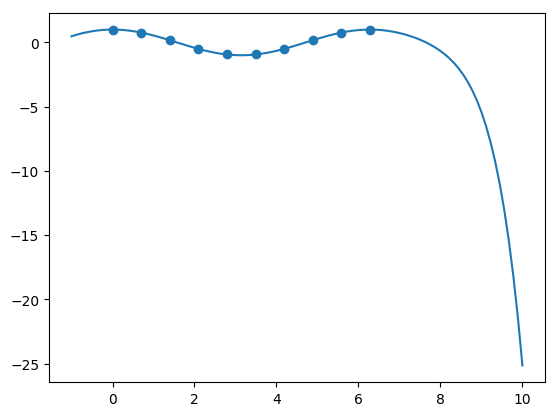

In [68]:
scatter(listx,listy)
plot(p,y)
show()